In [1]:
load("Figure5DE.rdata")

In [2]:
library(ggplot2)
library(ggrepel)
library(RColorBrewer)

In [3]:
p=NULL
for (i in seq(50)){

    kkt=kruskal.test(geneset_muts_level_z[,i] ~ geneset_muts_level_z$Group)
    p=c(p,kkt$p.value)
    }
names(p)=colnames(geneset_muts_level_z)[1:50]

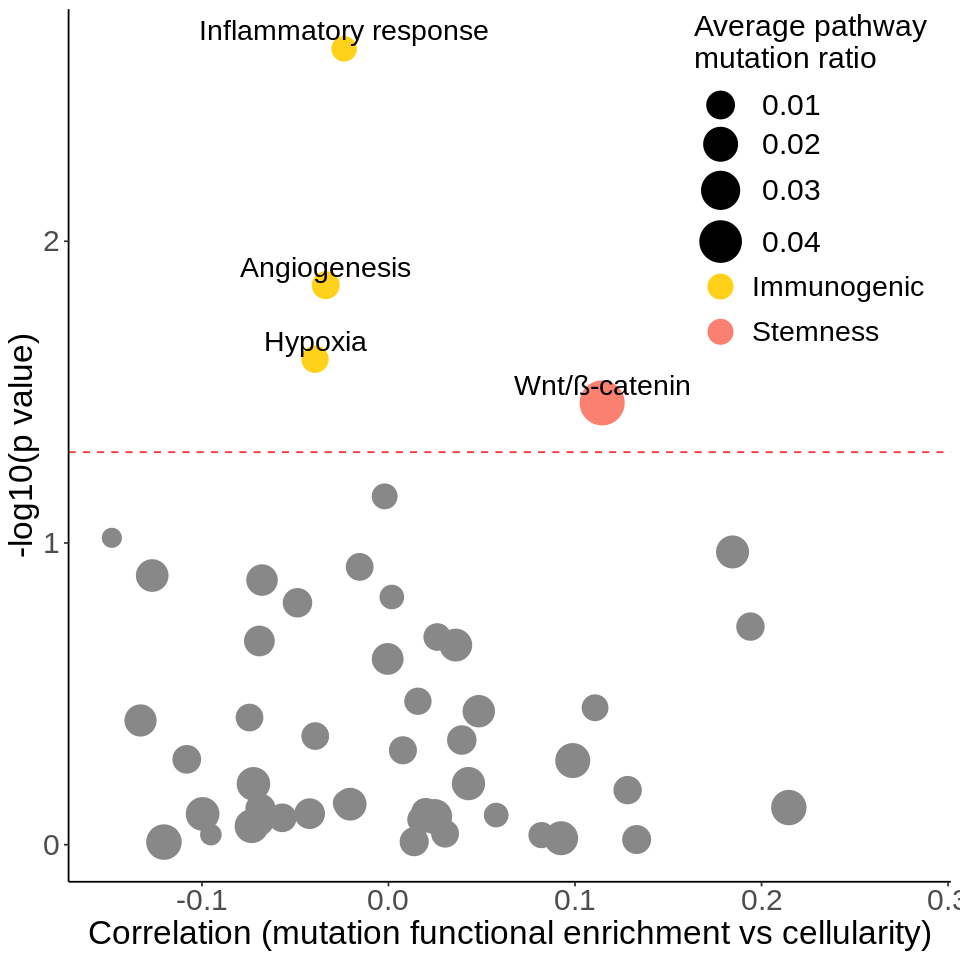

In [4]:
colors=brewer.pal(4, "Set3")
colors[2]= "#ffd11a"
names(colors)=levels(geneset_muts_level_z$Group)
bgcol=rep("#888888",50)
names(bgcol)=gsub("HALLMARK_","",colnames(geneset_muts_level_z)[1:50])
bgcol[p<0.05]=colors[c(2,4,2,2)]

options(repr.plot.width=8,repr.plot.height=8)
p1=ggplot(dat,aes(x=correlation,y=logp,color=geneset))+
    geom_point(aes(size = all_mean))+
    scale_size_continuous(range=c(5,12))+
    scale_color_manual(values = bgcol)+
    guides(color = FALSE,size=guide_legend(title="Average pathway\nmutation ratio"))+
    geom_hline(yintercept = -log10(0.05),linetype="dashed",color='#FF3333')+
    labs(x="Correlation (mutation functional enrichment vs cellularity)",y="-log10(p value)")+xlim(-0.15,0.28)+
    annotate("pointrange", x = 0.178, y = 1.85, ymin = 2, ymax = 2,
      colour = colors[2], size = 1.5)+
    annotate("pointrange", x =0.178, y = 1.7, ymin = 1.7, ymax = 1.7,
      colour = colors[4], size = 1.5)+
    annotate("text", x = c(0.195,0.195), y = c(1.85,1.7), label=c("Immunogenic","Stemness"),hjust=0,size=6)+
    theme_classic()+
    geom_text_repel(data=subset(dat, p<0.05),
            aes(correlation,logp,label=c("Hypoxia","Wnt/ß-catenin","Inflammatory response","Angiogenesis")),size=6,nudge_x=0,nudge_y=0.05,color="black")+
    theme(legend.position = c(0.84,0.85),
          legend.background=element_rect(fill=NA),
          legend.text = element_text(size=18,hjust = 0),
          legend.title=element_text(size=18),
          axis.title=element_text(size=20),
          axis.text =element_text(size=18))

p1

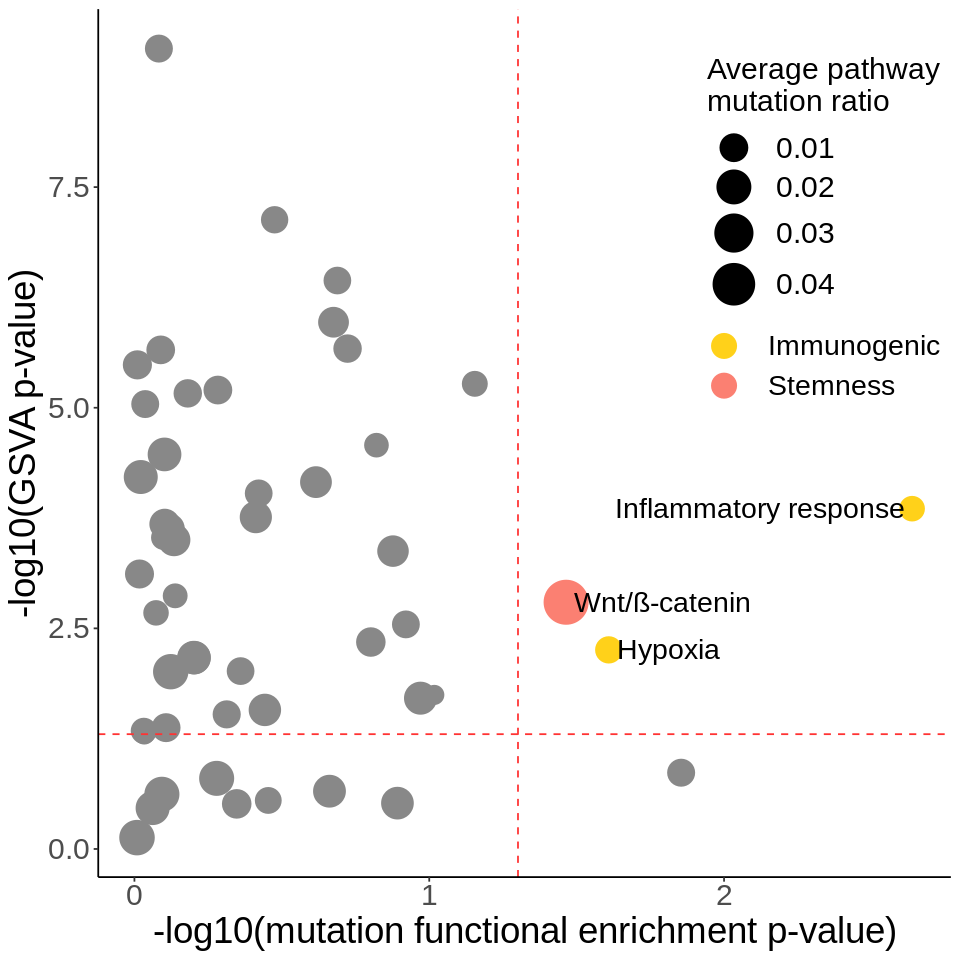

In [5]:
bgcol=rep("#888888",50)
names(bgcol)=gsub("HALLMARK_","",colnames(geneset_muts_level_z)[1:50])
bgcol[p<0.05 & sp$x<0.05]=colors[c(2,4,2)]

p2=ggplot(pdat,aes(x=Mutation,y=ssGSEA,color=geneset))+
    geom_point(aes(size = mean))+
    scale_size_continuous(range=c(5,12))+
    scale_color_manual(values = bgcol)+
    guides(color = FALSE,size=guide_legend(title="Average pathway\nmutation ratio"))+
    geom_hline(yintercept = -log10(0.05),linetype="dashed",color='#FF3333')+
    geom_vline(xintercept = -log10(0.05),linetype="dashed",color='#FF3333')+
    labs(x="-log10(mutation functional enrichment p-value)",y="-log10(GSVA p-value)")+
    annotate("pointrange", x = 2, y = 5.25, ymin = 5.5, ymax = 5.5,
      colour = colors[4], size = 1.5)+
    annotate("pointrange", x = 2, y = 5.7, ymin = 5.8, ymax = 5.8,
      colour = colors[2], size = 1.5)+
    annotate("text", x = c(2.15,2.15), y = c(5.25,5.7), label=c("Stemness","Immunogenic"),hjust=0,size=6)+
    theme_classic()+
    geom_text_repel(data=pdat[pdat$Mutation>1.301 & pdat$ssGSEA >1.301,],
            aes(Mutation,ssGSEA,label=c("Hypoxia","Wnt/ß-catenin","Inflammatory response")),size=6,nudge_x=0.15,color="black")+
    theme(legend.position = c(0.85,0.8),
          legend.background=element_rect(fill=NA),
          legend.text = element_text(size=18),
          legend.title=element_text(size=18),
          axis.title=element_text(size=22),
          axis.text =element_text(size=18))
  
p2